# Data Preparation

What is: Profiling, cleaning, enriching

Why: What we feed our model, it's what we get. Poor data = poor model

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# %pip install pandas numpy matplotlib seaborn;

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# %pip install scikit-learn

from sklearn.impute import SimpleImputer 

## Titanic Dataset

Goal: create a model

In [114]:
train = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_data.csv')
train.shape

(891, 12)

In [115]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
test = pd.read_csv('https://raw.githubusercontent.com/aiplanethub/Datasets/master/titanic_test.csv')
test.shape

(418, 11)

In [117]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [118]:
# Data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [119]:
# Variables númericas (estadisticas)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
train['Sex'].value_counts()
train['Sex'].value_counts(normalize=True)*100

Sex
male      577
female    314
Name: count, dtype: int64

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

In [121]:
train['Embarked'].value_counts()
train['Embarked'].value_counts(normalize=True)*100

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64

In [122]:
train['Survived'].value_counts()
train['Survived'].value_counts(normalize=True)*100

Survived
0    549
1    342
Name: count, dtype: int64

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

### Data cleaning

In [123]:
# Delete unrelevant
del train['Name']
del train['Ticket']
del train['PassengerId']

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


#### Data formating errors

In [124]:
# Data formating error


#### Missing Values

In [125]:
# Missing Values
missing = train.isnull().sum()
missing[missing > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [126]:
missing[missing > 0] / train.shape[0] * 100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

Que hacer? Eliminar los datos (si no son muchos) o imputarlos (llenar lo que falta)

Eliminación

- Pairwise: eliminar solo el valor, no tomar en cuenta esos valores nulos
- Listwise: se elimina la fila que contine el valor 
- Dropping: Eliminar las columnas

In [127]:
#  Cabin tiene muchos nulos (~77%), hacemos dropping 
del train["Cabin"]

In [128]:
missing = train.isnull().sum()
missing[missing > 0]

Age         177
Embarked      2
dtype: int64

Imputar datos

Hay varias formas de imputar datos. De forma general, para la series no temprales, se pueden imputar contantes o la estadisticas (media, mediana, moda). 

In [129]:
# Imputar la media 

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train["Age"] = mean_imputer.fit(train[["Age"]]).transform(train[["Age"]]).ravel()

In [130]:
missing = train.isnull().sum()
missing[missing > 0]

Embarked    2
dtype: int64

In [131]:
# Imputar la moda
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

train["Embarked"] = mode_imputer.fit(train[["Embarked"]]).transform(train[["Embarked"]]).ravel()

In [132]:
missing = train.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

#### Outliners


Anomalias, expecionalmente fuera del mainstream de los datos

Por qué?
- Error de medición 
- Corrupción de datos 
- Verdadero outlinear (una expecionalidad de verdad)

Tipos 
- Univariable 
- Multivariable 

Metodos 
Hay varios. Entre ellos:
- Regla de la desviación estandar 
- Rango inter cuartilico 
- Otros: insolations forest, min. covariance determinat, local outliner factor, one-class SVM, BDSscan clustering 

La regla de la desviacón estandar indica que toedo lo que sea mayor que la $media + 3* SD$ o menor que la $media - 3*SD$ es un outliner

In [133]:
# Standar deviation method for age 

age_mean = train["Age"].mean()
age_std = train["Age"].std()

ll = age_mean - 3 * age_std # Lower limit
hl = age_mean + 3 * age_std # Higher limit

age_outliners = train[(train["Age"] < ll) | (train["Age"] > hl)]
age_outliners.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
672,0,2,male,70.0,0,0,10.5000,S


El método intercuantilico (IQR) se basa en dividir los datos en cuartiles. Los outlineres serán aquellos que esten por fuera del rango maz y minimo 

$Max = Q_3 + 1.5 * IQR$

$Min = Q_1 - 1.5 * IQR$

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S
15,1,2,female,55.0,0,0,16.0000,S


<Axes: ylabel='Age'>

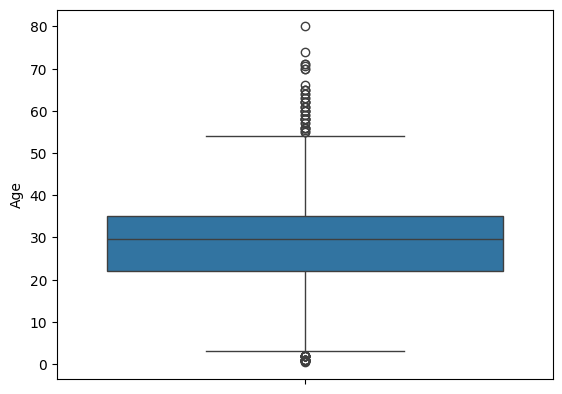

In [134]:
# IQR method 

q1 = train["Age"].quantile(.25)
q3 = train["Age"].quantile(.55)
iqr = q3 - q1 

max_range = q3 + 1.5 * iqr 
min_range = q1 - 1.5 * iqr 

age_outliners =  train[(train["Age"] < min_range) | (train["Age"] > max_range)]
age_outliners.head()

sns.boxplot(y="Age", data=train, whis=1.5)

Qué hacer? 
- Imputación 
- Eliminar valores 
- top, bottom and zerp coding (se conoce el limite inferior de los datos, no puede ser negativo).
- Discreatization (bining): agrupar

In [135]:
# Bining 
min_age = int(np.floor(train.Age.min()))
max_age = int(np.ceil(train.Age.max()))
age_range = max_age - min_age

num_groups = 10 

inter = int(np.round(age_range / num_groups))

min_age, max_age, inter

(0, 80, 8)

<Axes: xlabel='count', ylabel='age_labels'>

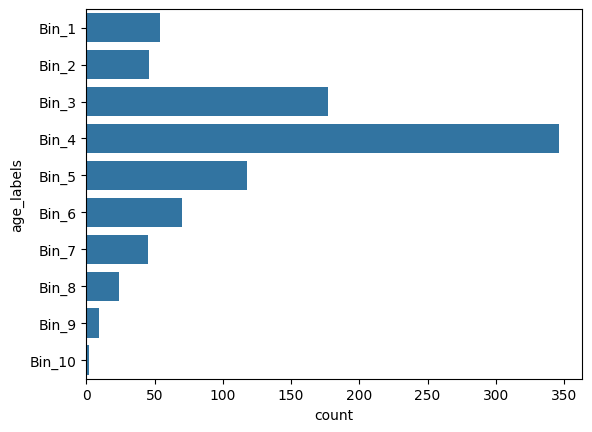

In [136]:
intervals = list(range(min_age, max_age + inter, inter))
labels = [f"Bin_{i}" for i in range(1, len(intervals))]

train['age_labels'] = pd.cut(x = train.Age, bins=intervals, labels=labels, include_lowest=True)
train['age_interval'] = pd.cut(x = train.Age, bins=intervals, include_lowest=True)

sns.countplot(train.age_labels)

#### Duplicates

Antes de remover duplicados
- Asegurarse que no sean datos reales 
- Preguntarse ¿por qué hay datos duplicados en los datos=

In [137]:
# Duplicates

## Fraud Dataset

In [22]:
fraud_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv")
fraud_data.shape
fraud_data.head()

(59054, 434)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleaning

In [23]:
fraud_data.isFraud.value_counts()
fraud_data.isFraud.value_counts(normalize=True) * 100

isFraud
0    57049
1     2005
Name: count, dtype: int64

isFraud
0    96.604802
1     3.395198
Name: proportion, dtype: float64

<Axes: xlabel='isFraud', ylabel='count'>

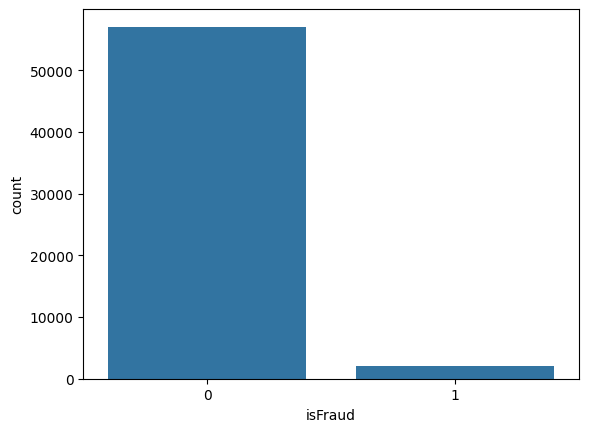

In [24]:
sns.countplot(x = "isFraud", data=fraud_data)

In [25]:
missing = fraud_data.isnull().sum()
missing[missing > 0]

missing[missing > 0] / fraud_data.shape[0] * 100

card2           915
card3           158
card4           162
card5           444
card6           159
              ...  
id_36         44849
id_37         44849
id_38         44849
DeviceType    44869
DeviceInfo    47133
Length: 414, dtype: int64

card2          1.549429
card3          0.267552
card4          0.274325
card5          0.751854
card6          0.269245
                ...    
id_36         75.945745
id_37         75.945745
id_38         75.945745
DeviceType    75.979612
DeviceInfo    79.813391
Length: 414, dtype: float64

In [26]:
# missing values 

# Fill with mean numerical collumns

num_cols = fraud_data.select_dtypes(include=np.number).columns 
fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean())  

# Fill with mode categorical collumns 

cat_cols = fraud_data.select_dtypes(include = 'object').columns    
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0]) 

In [27]:
missing = fraud_data.isnull().sum()
missing[missing > 0] / fraud_data.shape[0] * 100

Series([], dtype: float64)

In [28]:
# One shot ecoding 
fraud_data.shape
fraud_data = pd.get_dummies(fraud_data, columns=cat_cols)
fraud_data.shape

(59054, 434)

(59054, 1667)

### Feature Engineering 

Transformar los datos para producir salidas más significativias. 

ML no puede procesar texto, por lo que hay que tranformar esos datos en númericos 

- Ordinal encoding: ranking 
- One hot encoding: mapear cada valor cateogirco con un valor númerico. No funciona con regresión linear 
- Dummpy variable ecoding (regresión linear)
- Bining: datos ordinales y categoricos -> Hacer el modelo mas robusto y prevenir el sobreajuste

Tranformaciones
- Log: la magnitud de los datos cambia con los rangos de losa datos, ayuda a comprender la magnitud de diferencia y disminuye el impacto de los outlines. No puede manejar datos neegativos. En caso de tenerlos, se pueden desplaar 

Scaling 
- Normalización: ayudar a comparar datos en diferentes escalas o grupo de personas 
    $$
    x_{norm} = \cfrac{x - x_{min}}{x_{max} - x_{min}}
    $$
- Estadarización 
    $$
    z = \cfrac{x - \mu}{\delta}
    $$

In [29]:
# Feuture transformation 

X = fraud_data.drop(columns=["isFraud"])
Y = fraud_data.isFraud
X.shape, Y.shape, fraud_data.shape


((59054, 1666), (59054,), (59054, 1667))

In [30]:
from sklearn.preprocessing import StandardScaler

scaled_feat = StandardScaler().fit_transform(X)
scaled_feat = pd.DataFrame(data = scaled_feat)
scaled_feat.columns = X.columns 

scaled_feat.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,-1.688548,-1.544958,-0.468203,-0.021940,1.412632,-0.286861,0.653753,-0.225982,0.077832,1.224253e-16,...,-0.00582,-0.004115,67.391508,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
1,1.615662,1.681426,-0.073540,-0.406928,-1.078794,-0.286861,-0.804662,-1.144356,0.077832,1.582320e+00,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
2,0.266093,0.219070,-0.258976,0.585989,0.881042,2.788641,0.605139,-0.069441,-10.788933,1.224253e-16,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
3,-0.959645,-1.032167,1.140478,0.491581,1.188468,-0.286861,-0.099761,1.569022,0.077832,1.224253e-16,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
4,1.043171,1.053404,-0.438389,-0.185621,0.580022,-0.286861,0.653753,-0.278162,0.077832,-4.551081e-01,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115


### Train & test split

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)


# Test size is 30% 

### Class imbalance

Bias. 

Tipos: 
- Minority class: pocos ejemplos 
- Mayority class: muchos ejemplos 

Que hacer? 
- Resampling
    - Oversamplig minority class: añadir mas copias de la clase minoritaria. Es una buena elección cuando no hay muchos datos.
    - Undersampling mayority class: remover información 
- Generate suntatic simple (SMOTE): En vez de duplicar, se crean samples utilizando el algoritmo del vercino mas cercano 

In [32]:
from sklearn.utils import resample

train_data = pd.concat([X_train, Y_train], axis=1)
train_data.shape

(41337, 1667)

In [33]:
non_fraud = train_data[train_data.isFraud == 0]
fraud = train_data[train_data.isFraud == 1]

In [39]:
fraud_oversample = resample(
    fraud,
    replace = True,
    n_samples = len(non_fraud),
    random_state=27)

fraud_oversample.head()
fraud_oversample.shape

oversampled = pd.concat([non_fraud, fraud_oversample])
oversampled.head()
oversampled.shape

oversampled.isFraud.value_counts()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo,isFraud
42596,3197116,4847294,49.672,11201,103.0,185.0,226.0,290.653939,86.806616,115.655837,...,False,False,False,False,False,False,False,False,False,1
5678,3252526,6420106,200.000,10229,276.0,150.0,226.0,191.000000,87.000000,115.655837,...,False,False,False,False,False,False,False,False,False,1
12442,3314774,8054678,440.000,6019,583.0,150.0,226.0,231.000000,87.000000,115.655837,...,False,False,False,False,False,False,False,False,False,1
6154,3564009,15353032,303.950,10023,111.0,150.0,226.0,325.000000,87.000000,19.000000,...,False,False,False,False,False,False,False,False,False,1
46422,3100917,2219558,125.000,1333,170.0,150.0,195.0,330.000000,87.000000,115.655837,...,False,False,False,False,False,False,False,False,False,1


(39942, 1667)

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo,isFraud
20911,3145586,3331547,107.95,1214,523.0,150.0,226.0,123.0,87.0,8.000000,...,False,False,False,False,False,False,False,False,False,0
4756,3552524,14999631,59.00,10112,360.0,150.0,166.0,184.0,87.0,63.000000,...,False,False,False,False,False,False,False,False,False,0
50447,3480494,12871254,39.00,1762,161.0,150.0,226.0,441.0,87.0,18.000000,...,False,False,False,False,False,False,False,False,False,0
13104,3232758,5853279,113.00,17188,321.0,150.0,226.0,299.0,87.0,115.655837,...,False,False,False,False,False,False,False,False,False,0
15845,3118652,2603679,50.00,2455,321.0,150.0,226.0,299.0,87.0,6.000000,...,False,False,False,False,False,False,False,False,False,0


(79884, 1667)

isFraud
0    39942
1    39942
Name: count, dtype: int64

In [40]:
non_fraud_undersample = resample(
    non_fraud,
    replace = False,
    n_samples = len(fraud),
    random_state=27)

non_fraud_undersample.head()
non_fraud_undersample.shape

undersampled = pd.concat([non_fraud_undersample, fraud])
undersampled.head()
undersampled.shape

undersampled.isFraud.value_counts()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo,isFraud
27327,3159853,3734559,1298.00,10616,583.0,150.0,226.0,231.0,87.0,115.655837,...,False,False,False,False,False,False,False,False,False,0
20134,3063438,1669402,47.95,3666,555.0,150.0,226.0,170.0,87.0,11.000000,...,False,False,False,False,False,False,False,False,False,0
28303,3547755,14853697,125.00,15775,481.0,150.0,102.0,330.0,87.0,115.655837,...,False,False,False,False,False,False,False,False,False,0
38758,3487311,13116975,139.95,9480,170.0,150.0,226.0,337.0,87.0,115.655837,...,False,False,False,False,False,False,False,False,False,0
12011,3097527,2159784,26.95,7005,111.0,150.0,226.0,310.0,87.0,115.655837,...,False,False,False,False,False,False,False,False,False,0


(1395, 1667)

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo,isFraud
27327,3159853,3734559,1298.00,10616,583.0,150.0,226.0,231.0,87.0,115.655837,...,False,False,False,False,False,False,False,False,False,0
20134,3063438,1669402,47.95,3666,555.0,150.0,226.0,170.0,87.0,11.000000,...,False,False,False,False,False,False,False,False,False,0
28303,3547755,14853697,125.00,15775,481.0,150.0,102.0,330.0,87.0,115.655837,...,False,False,False,False,False,False,False,False,False,0
38758,3487311,13116975,139.95,9480,170.0,150.0,226.0,337.0,87.0,115.655837,...,False,False,False,False,False,False,False,False,False,0
12011,3097527,2159784,26.95,7005,111.0,150.0,226.0,310.0,87.0,115.655837,...,False,False,False,False,False,False,False,False,False,0


(2790, 1667)

isFraud
0    1395
1    1395
Name: count, dtype: int64